$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 1}$
---

Data: https://archive.ics.uci.edu

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

---

## Dataset: Forest Fires

In [2]:
# imports
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Access Dataset

In [18]:
df = pd.DataFrame(pd.read_csv('Datasets/forestfires.csv'))
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [19]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


---
### $\textbf{Correlation Plot}$

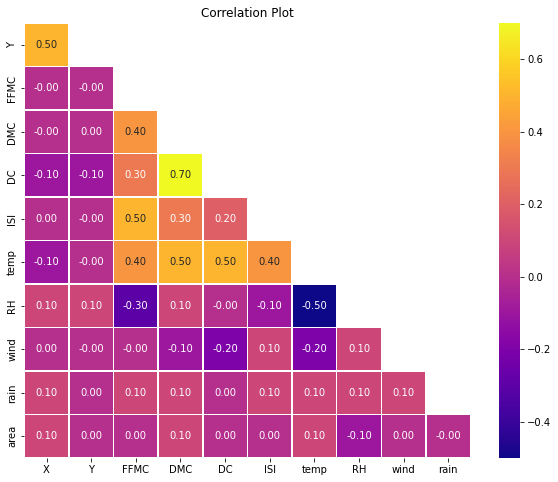

In [20]:
# Correlation
df_corr = df.corr().round(1)


# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna('columns', how='all')
fig = px.imshow(df_corr_viz, text_auto=True)


plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_viz, cmap='plasma', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

---
### $\textbf{Distribution Fit}$

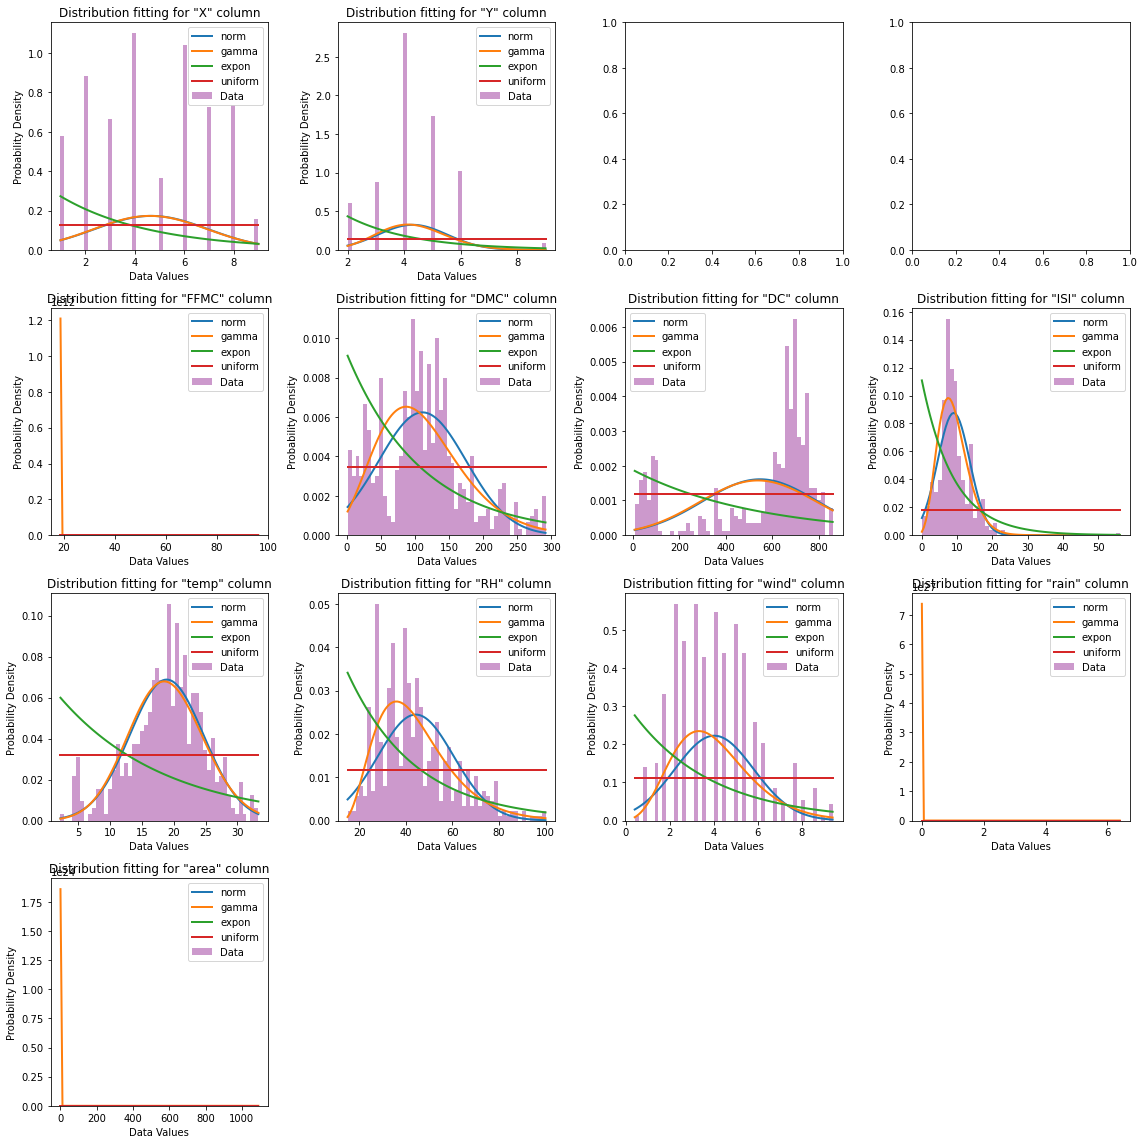

In [21]:
continuous_dist = [stats.norm, stats.gamma, stats.expon, stats.uniform]

best_fit_dist = {}

subplot_cols = 4
subplot_rows = (len(df.columns) + subplot_cols - 1) // subplot_cols

fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(16, 4 * subplot_rows))
axes = axes.flatten()  # Flatten in case there's only one row of plots

for i, column in enumerate(df.columns):
    if column == 'month' or column == 'day':
        continue  # Skip non-numeric columns
    
    data = df[column]

    ax = axes[i]

    ax.set_title(f'Distribution fitting for "{column}" column')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')

    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data', color='purple')

    best_fit_stat = np.inf
    best_fit_dist[column] = None

    x = np.linspace(data.min(), data.max(), 100)
    for dist in continuous_dist:
        params = dist.fit(data)
        pdf = dist.pdf(x, *params)
        test = stats.kstest(data, dist.cdf, args=params)

        if test.statistic < best_fit_stat:
            best_fit_stat = test.statistic
            best_fit_dist[column] = dist

        ax.plot(x, pdf, lw=2, label=dist.name)

    ax.legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Determine and display the best probability distribution fit of each column

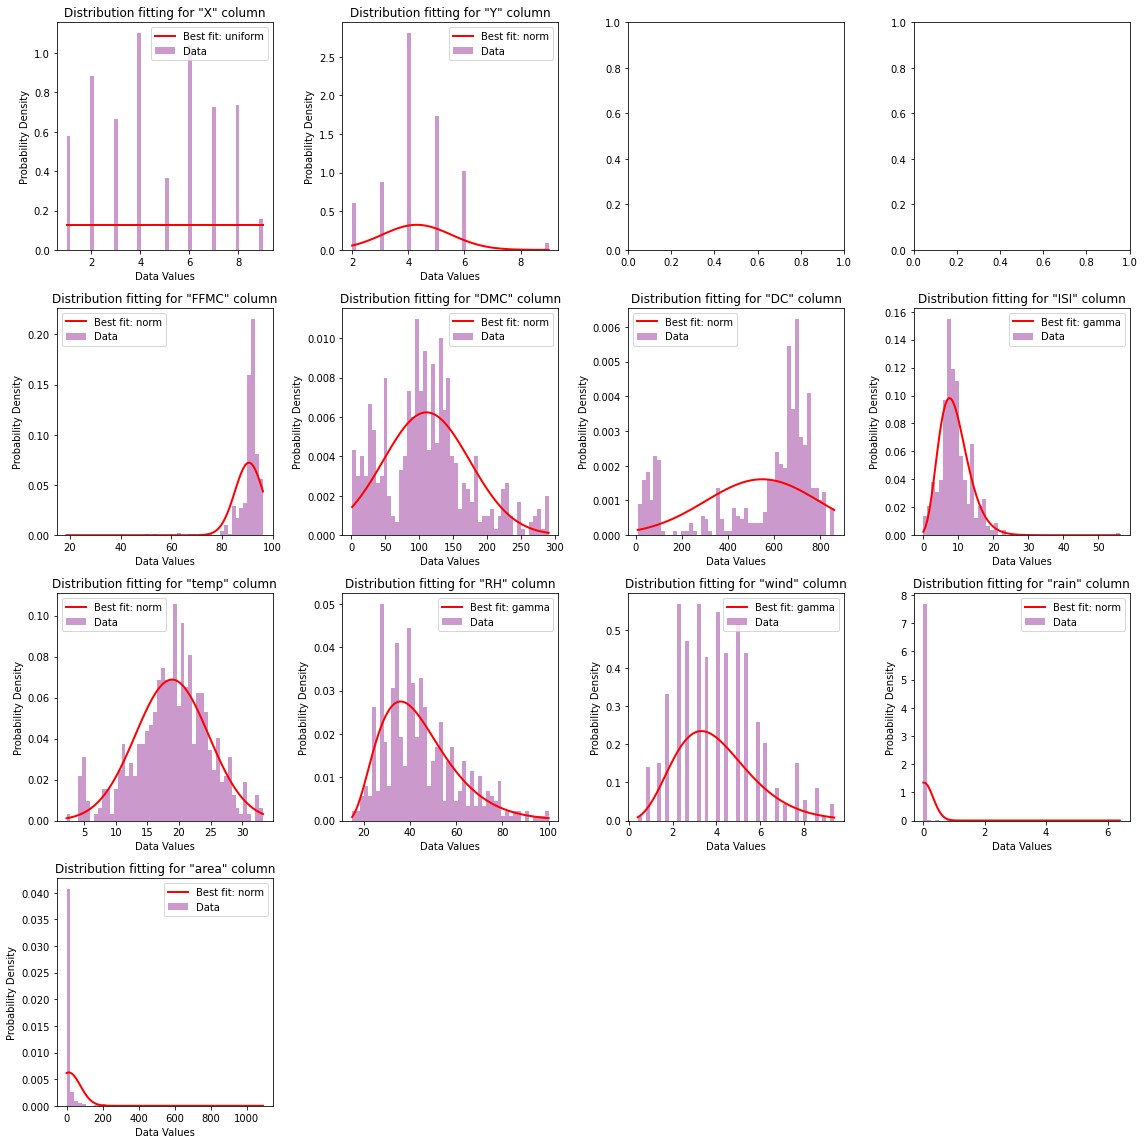

In [22]:
continuous_dist = [stats.norm, stats.gamma, stats.expon, stats.uniform]

best_fit_dist = {}

subplot_cols = 4
subplot_rows = (len(df.columns) - 1) // subplot_cols + 1

fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(16, 4 * subplot_rows))
axes = axes.flatten()  # Flatten in case there's only one row of plots

for i, column in enumerate(df.columns):
    if column == 'month' or column == 'day':
        continue  # Skip non-numeric columns
    
    data = df[column]

    ax = axes[i]

    ax.set_title(f'Distribution fitting for "{column}" column')
    ax.set_xlabel('Data Values')
    ax.set_ylabel('Probability Density')

    ax.hist(data, bins=50, density=True, alpha=0.4, label='Data', color='purple')

    best_fit_stat = np.inf
    best_fit_dist[column] = None

    x = np.linspace(data.min(), data.max(), 100)
    for dist in continuous_dist:
        params = dist.fit(data)
        pdf = dist.pdf(x, *params)
        test = stats.kstest(data, dist.cdf, args=params)

        if test.statistic < best_fit_stat:
            best_fit_stat = test.statistic
            best_fit_dist[column] = dist
            best_fit_params = params
            best_fit_pdf = pdf

    ax.plot(x, best_fit_pdf, lw=2, color='red', label=f'Best fit: {best_fit_dist[column].name}')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
### $\textbf{Summary Statistics}$

In [23]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


---
### $\textbf{Hypothesis Test}$

Determine the __Impact of Temperature on Fire Area__

> _Hypothesis_: Higher temperature result in larger fire areas

$ H0 $ = There is no significant relationship between temperature and fire area. <br>
$ H1 $ = There is a significant relationship between temperature and fire area.

1. Extract Temperature and Area Columns

In [24]:
temp = df['temp']
area = df['area']

2. Manual Calculation for Pearson Correlation Coeffecient to test hypothesis

In [25]:
# Calculate mean
mean_temp = np.mean(temp)
mean_area = np.mean(area)

# Compute difference from mean
diff_temp = temp - mean_temp
diff_area = area - mean_area

# Calculate covariance
covariance = np.sum(diff_temp * diff_area) / (len(temp) - 1)

# Compute Standard deviation
std_temp = np.sqrt(np.sum(diff_temp**2) / (len(temp) - 1))
std_area = np.sqrt(np.sum(diff_area**2) / (len(temp) - 1))

# Calculate Pearson's correlation coefficient
pearson_corr_manual = covariance / (std_temp * std_area)

print(f"Manual Pearson correlation coefficient: {pearson_corr_manual}")

Manual Pearson correlation coefficient: 0.09784410734168457


3. Recheck manual computation by comparison

In [26]:
# Calculate Pearson's correlation coefficient

# Using Numpy
pearson_corr_numpy = np.corrcoef(temp, area)[0, 1]

# Using pandas
pearson_corr_pandas = temp.corr(area)

# Using scipy.stats.pearsonr
pearson_corr_scipy, p_value_scipy = stats.pearsonr(temp, area)

# RESULTS
print(f"Manual Pearson correlation coefficient: {pearson_corr_manual}")
print("\nResults in:")
print(f"numpy: {pearson_corr_numpy}")
print(f"pandas: {pearson_corr_pandas}")
print(f"scipy.stats.pearsonr: {pearson_corr_scipy}")

Manual Pearson correlation coefficient: 0.09784410734168457

Results in:
numpy: 0.09784410734168457
pandas: 0.09784410734168457
scipy.stats.pearsonr: 0.09784410734168458


4. Plot the relationship between __Temperature and Fire area__

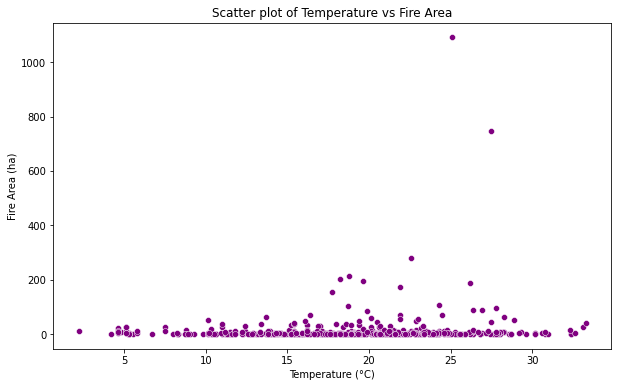

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temp, y=area, color='purple')
plt.title('Scatter plot of Temperature vs Fire Area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Area (ha)')
plt.show()

5. Interpret Results

In [28]:
alpha = 0.05  # Significance level

if p_value_scipy < alpha:
    print("\nReject the null hypothesis: There IS a significant relationship between temperature and fire area.")
else:
    print("\nFail to reject the null hypothesis: There IS NO significant relationship between temperature and fire area.")


Reject the null hypothesis: There IS a significant relationship between temperature and fire area.
